<h1>Credit Card Fraud Detection - Kaggle Competition - Random Forest</h1> 

<a name='index'></a>
<h2>1. INDEX</h2>
<ul>
    <li><a href='#load'>Load, Clean and Explore Data</a></li>
    <li><a href='#imbalance'>Dealing with Imbalanced Data</a></li>
    <li><a href='#split'>Splitting Data</a></li>
    <li><a href='#rf'>Random Forest</a></li>
    <li><a href='#opt'>Finetuning using GridSearchCV</a></li>
    <li><a href='#comparison'>Comparison - Tuned vs Untuned Model</a></li>
    <li><a href='#cv'>Cross Validation</a></li>
    <li><a href='#vis'>Random Forests - Visualisation</a></li>
    <li><a href='#glos'>Glossary</a></li>
</ul>

<H2>2. Introduction</H2>
<br>
<h4>Random Forest Model is often used in:</h4>
<ol>
 <li>Banking Industry</li>
    <ol style="list-style-type: lower-alpha; padding-bottom: 0;">
        <li style="margin-left:2em">Credit Card Fraud Detection</li>
        <li style="margin-left:2em">Customer Segmentation</li>
        <li style="margin-left:2em">Predicting Loan Defaults on LendingClub.com</li>
        <br>
    </ol>
 <li>Healthcare and Medicine
     <ol style="list-style-type: lower-alpha; padding-bottom: 0;">
         <li style="margin-left:2em">Cardiovascular Disease Prediction</li>
         <li style="margin-left:2em; padding-bottom: 0;">Diabetes Prediction</li>
         <li style="margin-left:2em; padding-bottom: 0;">Breast Cancer Prediction</li>
          <br>
     </ol>
 </li>
 <li>Stock Market</li>
     <ol style="list-style-type: lower-alpha; padding-bottom: 0;">
         <li style="margin-left:2em">Stock Market Prediction</li>
         <li style="margin-left:2em; padding-bottom: 0;">Stock Market Sentiment Analysis</li>
         <li style="margin-left:2em; padding-bottom: 0;">Bitcoin Price Detection</li>
          <br>
     </ol>
 <li>E-Commerce</li>
     <ol style="list-style-type: lower-alpha; padding-bottom: 0;">
         <li style="margin-left:2em">Product Recommendation</li>
         <li style="margin-left:2em; padding-bottom: 0;">Price Optimization</li>
         <li style="margin-left:2em; padding-bottom: 0;">Search Ranking</li>
     </ol>
      <br>
</ol>

Great detailed description of applications of Random Forest Algorithm is described <a href="https://iq.opengenus.org/applications-of-random-forest/">here</a>

Advantages of trees:
<ul>
    <li>Random forest algorithm is suitable for both classifications and regression task</li>
    <li>It gives higher accuracy through cross validation</li>
    <li>Random forest classifier can handle the missing values and maintain the accuracy of a large proportion of data</li>
    <li>If there are more trees, it doesn't allow over-fitting trees in the model</li>
    <li>It has abilitiy to work upon a large data set with higher dimensionality</li>
</ul>


<H2>3. LOAD LIBRARIES</H2>

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import time
from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

from sklearn.model_selection import train_test_split # data split
from termcolor import colored as cl # text customization

from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm

#Import Metrics
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 
from sklearn.metrics import matthews_corrcoef 

# To plot confusion matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Finetuining using GridSearchCV
from sklearn.model_selection import GridSearchCV

# Cross Validation
from sklearn.model_selection import cross_val_score

# Visualizing the random tree
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot

<h2>4. MISCELLANEOUS</h2>

In [2]:
""" This funciton When called out measures time of execution of cell """
def exec_time(start, end):
   diff_time = end - start
   m, s = divmod(diff_time, 60)
   h, m = divmod(m, 60)
   s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
   print("Execution Time: " + "{0:02d}:{1:02d}:{2:02d}".format(h, m, s))
   return round(diff_time/60, 0);
""" 
How to use:
In measured cell add \"start \" before measured code and \"end \" at the end of measured cell    
start = time.time()
...
...
end = time.time()
exec_time(start,end)

"""

' \nHow to use:\nIn measured cell add "start " before measured code and "end " at the end of measured cell    \nstart = time.time()\n...\n...\nend = time.time()\nexec_time(start,end)\n\n'

<a href='#index'>Back to Index</a>
<a name='load'></a>
<h2>5. LOAD, CLEAN AND EXPLORE DATA</h2>

In [3]:
# Load Data into pandas dataframe
df = pd.read_csv("creditcard.csv")

#Extend number of columns to display
pd.set_option("max_columns", 20) 

# Check the shape and Basic Statistical Description of each column in dataset
print("Shape: ", df.shape, "\n\nDescribtion: \n", df.describe())

Shape:  (284807, 31) 

Describtion: 
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std 

In [4]:
# Replace empty data with nan:
df = df.replace('', np.nan)

# Check if there are any nan data:
if len([df.iloc[i,j] for i,j in zip(*np.where(pd.isnull(df)))])==0 :
    print("No empty records")
else:
    for i,j in zip(*np.where(pd.isnull(df))):
        df.iloc[i,j]

No empty records


Check how many valid and how many fraudulent transactions are in the dataset.

In [5]:
# Count unique values in column Class
# By default, missing values are ignored
# Therefore, dropna = False makes value_counts to include missing values
cla_count = df.Class.value_counts(dropna = False)
print(cla_count)

0    284315
1       492
Name: Class, dtype: int64


In [6]:
#Count percentage of
cla_ratio_valid = round(cla_count[0]/df.shape[0] * 100, 2)
cla_ratio_fraud = round(cla_count[1]/df.shape[0] * 100, 2)
print("Share of valid transactions in the data set is ",cla_ratio_valid,"%  vs fraudulent transactions",cla_ratio_fraud,"%")

Share of valid transactions in the data set is  99.83 %  vs fraudulent transactions 0.17 %


There are 284315 rows (99.83%) of valid data and 492 rows (0.17%) fraudulent data, so it is very imbalanced data. Usually for imbalanced data, we can try:
<ol>
 <li>Collect more data (which wont work here since the data is given)</li>
 <li>Down-Sampling or Over-Sampling to get balanced samples</li>
 <li>Change the Thresholds to adjust the prediction</li>
 <li>Assign class weights for the low rate class</li>
</ol>

Since this is Fraud detection question, if we let go through a fraud, the credit company will incur a significant loss. If we mistakenly classify a valid transaction as fraudulent, the transaction can be reviewed by human expert or user can be asked for additional verification of the transaction. Therefore, in this specific case, False Positive will cause more significant damage than False Negative.


In [7]:
# Create a list of column headers with the analysied data
features= df.iloc[:,0:29].columns
features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

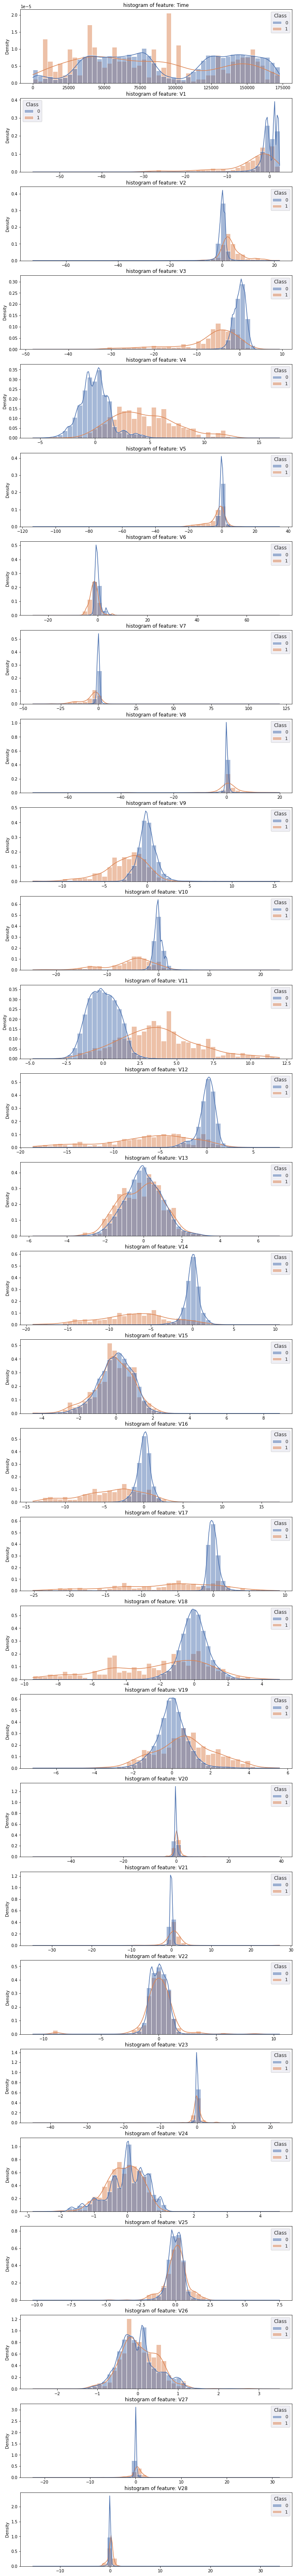

In [8]:
# Plot histograms of features
# Labels: https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot/31632745
# Seaborn cheat_sheet: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf
# Seaborn accepted data structers: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf
fig, axs = plt.subplots(29,1,figsize=(12,29*4))

for i, c in enumerate(df[features]):
    sns.set_theme()
    p1 = sns.histplot(data = df,ax = axs[i], x=df[c],
                 hue = "Class", alpha = 0.5, stat = "density",
                 bins=50, common_norm=False, kde=True
                )
    p1.set_title('histogram of feature: ' + str(c))
    p1.set(xlabel='')
    
plt.show()

In [9]:
# Split Data into fraudulent and legitimate
df_fraud = df[df.Class == 1]
df_legit = df[df.Class == 0]
# df.head()



outlier_fraction = len(df_fraud)/float(len(df_legit))
print(outlier_fraction)
print('Fraud cases: {}'.format(len(df_fraud)))
print('Valid Transaction: {}'.format(len(df_legit)))

0.0017304750013189597
Fraud cases: 492
Valid Transaction: 284315


In [10]:
print("\n\n Amount details of fraudulent transaction")
df_fraud.Amount.describe()



 Amount details of fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
print("\n\n Details of valid transaction")
df_legit.Amount.describe()



 Details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

From the comparison above, it can be seen that average fraudulent transaction has higher value than valid transaction 122.2 > 88.3
<br>

Lets have a look at correlations between all the factors:


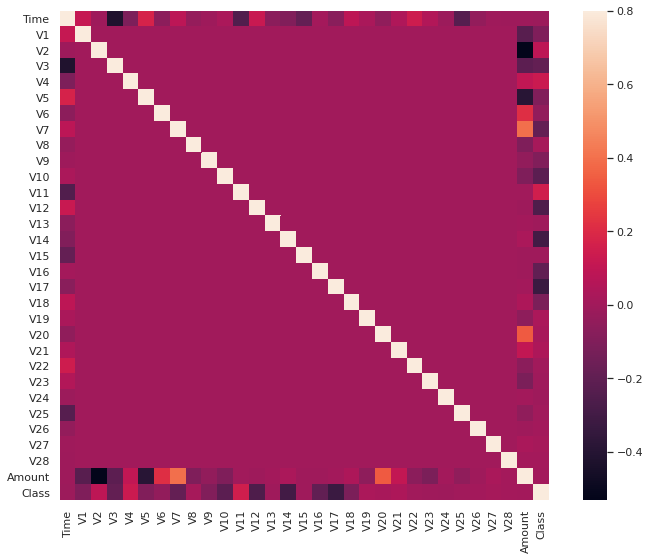

In [12]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

The HeatMap shows that most of the features do not correlate to other features but there are some features that has positive or a negative correlation with each other: 
<ul>
    <li>V2 and V5 highly negativelly correlate with the Amount</li>
    <li>V20 correlate well with amount</li>
</ul>

<a href='#index'>Back to Index</a>
<a name='imbalance'></a>
<h2>6. Dealing with Imbalanced Data</h2>

In [13]:
# All the data except Class is independent data so this is loaded into X
x = df.drop('Class', axis = 1).values
# Since we want to predict class (class = 1 fraud and class = 0 valid transaction)
y = df['Class'].values# All the data except Class is independent data so this is loaded into X

<h3>Under Sampling for Handling Imbalanced Data</h3>
Under sampling works by removing the data set with dominant number of data points

In [14]:
start = time.time()

nm = NearMiss()

# Implementing Undersampling for Handling Imbalanced Data
# x - independent variables but before splitting
# y - dependent variables but after splitting
x_nm, y_nm = nm.fit_resample(x, y)

end = time.time()
time_nm = exec_time(start,end)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Execution Time: 00:00:02


In [15]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_nm)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


<h3>Oversampling for Handling Imbalanced Data</h3>

In [16]:
start = time.time()

os = RandomOverSampler()
x_os, y_os = os.fit_resample(x,y)

end = time.time()

time_os = exec_time(start,end)

Execution Time: 00:00:00


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [17]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_os)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


<h3>Special Teqniques that mix Undersampling and Oversampling for Handling Imbalanced Data</h3>
<br>
SMOTETomek is a hybrid method which uses an under-sampling method (Tomek) with an over sampling method (SMOTE) involves the removal of the Tomek links which are the pairs of examples that are in closest proximity to each other or called the nearest neighbours but belongs to opposite classes.
Hence, the resulting dataset is free from the in between class crowded overlaps so that all nearest neighbours placed at the minimal distance belongs to one class only!


In [18]:
start = time.time()

# This runs for 56 min!!

smk = SMOTETomek(random_state = 42)

# Implementing Oversampling for Handling Imbalanced Data
# x - independent variables but before splitting
# y - dependent variables but after splitting

x_smk, y_smk = smk.fit_resample(x, y)

end = time.time()

time_smk = exec_time(start,end)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Execution Time: 00:00:21


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [19]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_smk)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 283781, 1: 283781})


<a href='#index'>Back to Index</a>
<a name='split'></a>
<h2>7. Splitting Data</h2>

In [20]:
#Spliting Unbalanced Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# print(cl('x_train samples : ', attrs = ['bold']), x_train[:1])
# print(cl('x_test samples : ', attrs = ['bold']), x_test[0:1])
# print(cl('y_train samples : ', attrs = ['bold']), y_train[0:20])
# print(cl('y_test samples : ', attrs = ['bold']), y_test[0:20])

#Spliting data with undersampled valid transactions
x_nm_train, x_nm_test, y_nm_train, y_nm_test = train_test_split(x_nm, y_nm, test_size = 0.2, random_state = 0)

#Spliting data with oversampled fraud transactions
x_os_train, x_os_test, y_os_train, y_os_test = train_test_split(x_os, y_os, test_size = 0.2, random_state = 0)

#Spliting data with imbalanced dealt with by applying SMOTETomek algorithm
x_smk_train, x_smk_test, y_smk_train, y_smk_test = train_test_split(x_smk, y_smk, test_size = 0.2, random_state = 0)

<a href='#index'>Back to Index</a>
<a name='rf'></a>
<h2>8. Random Forest</h2>
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees

In [21]:
start = time.time()

#Trained on Imbalanced Data
rf = RandomForestClassifier(max_depth = 4)
rf.fit(x_train, y_train)
rf_yhat = rf.predict(x_test)

end = time.time()
time_rf = exec_time(start,end)

Execution Time: 00:01:02


In [22]:
# Metrics for Imbalanced data
rf_acc = round(accuracy_score(y_test, rf_yhat) *100,1)
rf_pre = round(precision_score(y_test, rf_yhat) *100,1)
rf_rec = round(recall_score(y_test, rf_yhat) *100,1)
rf_f1 = round(f1_score(y_test, rf_yhat) *100,1)
rf_mcc = round(matthews_corrcoef(y_test, rf_yhat),2)
print(cl('Accuracy score of the Random Forest model is {}%'.format(rf_acc), attrs = ['bold']))
print(cl('Precision score of the Random Forest model is {}%'.format(rf_pre), attrs = ['bold']))
print(cl('Recall score of the Random Forest model is {}%'.format(rf_rec), attrs = ['bold']))
print(cl('f1 score of the Random Forest model is {}%'.format(rf_f1), attrs = ['bold']))
print(cl('Matthews Correlation Coefficient of the Random Forest model is {}'.format(rf_mcc), attrs = ['bold']))

Accuracy score of the Random Forest model is 99.9%
Precision score of the Random Forest model is 90.7%
Recall score of the Random Forest model is 67.3%
f1 score of the Random Forest model is 77.3%
Matthews Correlation Coefficient of the Random Forest model is 0.78


In [23]:
start = time.time()

#Trained on Data with undersampled valid data
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
rf_nm = RandomForestClassifier(max_depth = 4)
rf_nm.fit(x_nm_train, y_nm_train)
rf_nm_yhat = rf_nm.predict(x_test)

end = time.time()
time_rf_nm = exec_time(start,end)

Execution Time: 00:00:01


In [24]:
# Metrics for Data with undersampled valid data
rf_nm_acc = round(accuracy_score(y_test, rf_nm_yhat) *100,1)
rf_nm_pre = round(precision_score(y_test, rf_nm_yhat) *100,1)
rf_nm_rec = round(recall_score(y_test, rf_nm_yhat) *100,1)
rf_nm_f1 = round(f1_score(y_test, rf_nm_yhat) *100,1)
rf_nm_mcc = round(matthews_corrcoef(y_test, rf_nm_yhat),2)
print(cl('Accuracy score of the Random Forest model is {}%'.format(rf_nm_acc), attrs = ['bold']))
print(cl('Precision score of the Random Forest model is {}%'.format(rf_nm_pre), attrs = ['bold']))
print(cl('Recall score of the Random Forest model is {}%'.format(rf_nm_rec), attrs = ['bold']))
print(cl('f1 score of the Random Forest model is {}%'.format(rf_nm_f1), attrs = ['bold']))
print(cl('Matthews Correlation Coefficient of the Random Forest model is {}'.format(rf_nm_mcc), attrs = ['bold']))

Accuracy score of the Random Forest model is 94.1%
Precision score of the Random Forest model is 2.7%
Recall score of the Random Forest model is 94.1%
f1 score of the Random Forest model is 5.3%
Matthews Correlation Coefficient of the Random Forest model is 0.16


In [25]:
start = time.time()

#Trained on Data with oversampled fraud data
rf_os = RandomForestClassifier(max_depth = 4)
rf_os.fit(x_os_train, y_os_train)
rf_os_yhat = rf_os.predict(x_test)

end = time.time()
time_rf_os = exec_time(start,end)

Execution Time: 00:01:31


In [26]:
# Metrics for Data with oversampled fraud data
rf_os_acc = round(accuracy_score(y_test, rf_os_yhat) *100,1)
rf_os_pre = round(precision_score(y_test, rf_os_yhat) *100,1)
rf_os_rec = round(recall_score(y_test, rf_os_yhat) *100,1)
rf_os_f1 = round(f1_score(y_test, rf_os_yhat) *100,1)
rf_os_mcc = round(matthews_corrcoef(y_test, rf_os_yhat),2)
print(cl('Accuracy score of the Random Forest model is {}%'.format(rf_os_acc), attrs = ['bold']))
print(cl('Precision score of the Random Forest model is {}%'.format(rf_os_pre), attrs = ['bold']))
print(cl('Recall score of the Random Forest model is {}%'.format(rf_os_rec), attrs = ['bold']))
print(cl('f1 score of the Random Forest model is {}%'.format(rf_os_f1), attrs = ['bold']))
print(cl('Matthews Correlation Coefficient of the Random Forest model is {}'.format(rf_os_mcc), attrs = ['bold']))

Accuracy score of the Random Forest model is 99.6%
Precision score of the Random Forest model is 27.7%
Recall score of the Random Forest model is 90.1%
f1 score of the Random Forest model is 42.4%
Matthews Correlation Coefficient of the Random Forest model is 0.5


In [27]:
start = time.time()

#Spliting data with imbalanced data dealt with by applying SMOTETomek algorithm
rf_smk = RandomForestClassifier(max_depth = 4)
rf_smk.fit(x_smk_train, y_smk_train)
rf_smk_yhat = rf_smk.predict(x_test)

end = time.time()
time_rf_smk = exec_time(start,end)

Execution Time: 00:02:16


In [28]:
rf_smk_acc = round(accuracy_score(y_test, rf_smk_yhat) *100,1)
rf_smk_pre = round(precision_score(y_test, rf_smk_yhat) *100,1)
rf_smk_rec = round(recall_score(y_test, rf_smk_yhat) *100,1)
rf_smk_f1 = round(f1_score(y_test, rf_smk_yhat) *100,1)
rf_smk_mcc = round(matthews_corrcoef(y_test, rf_smk_yhat),2)
print(cl('Accuracy score of the Random Forest (SMOTETomek) model is {}%'.format(rf_smk_acc), attrs = ['bold']))
print(cl('Precision score of the Random Forest (SMOTETomek) model is {}%'.format(rf_smk_pre), attrs = ['bold']))
print(cl('Recall score of the Random Forest (SMOTETomek) model is {}%'.format(rf_smk_rec), attrs = ['bold']))
print(cl('f1 score of the Random Forest (SMOTETomek) model is {}%'.format(rf_smk_f1), attrs = ['bold']))
print(cl('Matthews Correlation Coefficient of the Random Forest model is {}%'.format(rf_smk_mcc), attrs = ['bold']))

Accuracy score of the Random Forest (SMOTETomek) model is 99.4%
Precision score of the Random Forest (SMOTETomek) model is 20.6%
Recall score of the Random Forest (SMOTETomek) model is 88.1%
f1 score of the Random Forest (SMOTETomek) model is 33.4%
Matthews Correlation Coefficient of the Random Forest model is 0.42%


<h3>Reciver Operating Characteristic (ROC) And Area Under the Curve of ROC</h3>

In [29]:
# predict probabilities
pred_prob = rf.predict_proba(x_test)
pred_prob_nm = rf_nm.predict_proba(x_test)
pred_prob_os = rf_os.predict_proba(x_test)
pred_prob_smk = rf_smk.predict_proba(x_test)

# roc curve for models
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
fpr_nm, tpr_nm, thresh_nm = roc_curve(y_test, pred_prob_nm[:,1], pos_label=1)
fpr_os, tpr_os, thresh_os = roc_curve(y_test, pred_prob_os[:,1], pos_label=1)
fpr_smk, tpr_smk, thresh_smk = roc_curve(y_test, pred_prob_smk[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score = round(roc_auc_score(y_test, pred_prob[:,1]),2)
auc_score_nm = round(roc_auc_score(y_test, pred_prob_nm[:,1]),2)
auc_score_os = round(roc_auc_score(y_test, pred_prob_os[:,1]),2)
auc_score_smk = round(roc_auc_score(y_test, pred_prob_smk[:,1]),2)

In [30]:
print(cl('AUC score for the Random Forest model (Unbalanced Data) is {}'.format(auc_score), attrs = ['bold']))
print(cl('AUC score for the Random Forest model (Under sampled Valid) is {}'.format(auc_score_nm), attrs = ['bold']))
print(cl('AUC score for the Random Forest model (Over sampled Fraud) is {}'.format(auc_score_os), attrs = ['bold']))
print(cl('AUC score of the Random Forest (SMOTETomek) model is {}'.format(auc_score_smk), attrs = ['bold']))

AUC score for the Random Forest model (Unbalanced Data) is 0.96
AUC score for the Random Forest model (Under sampled Valid) is 0.98
AUC score for the Random Forest model (Over sampled Fraud) is 0.99
AUC score of the Random Forest (SMOTETomek) model is 0.98


<h3>Confusion Matrices and ROC plots</h3>

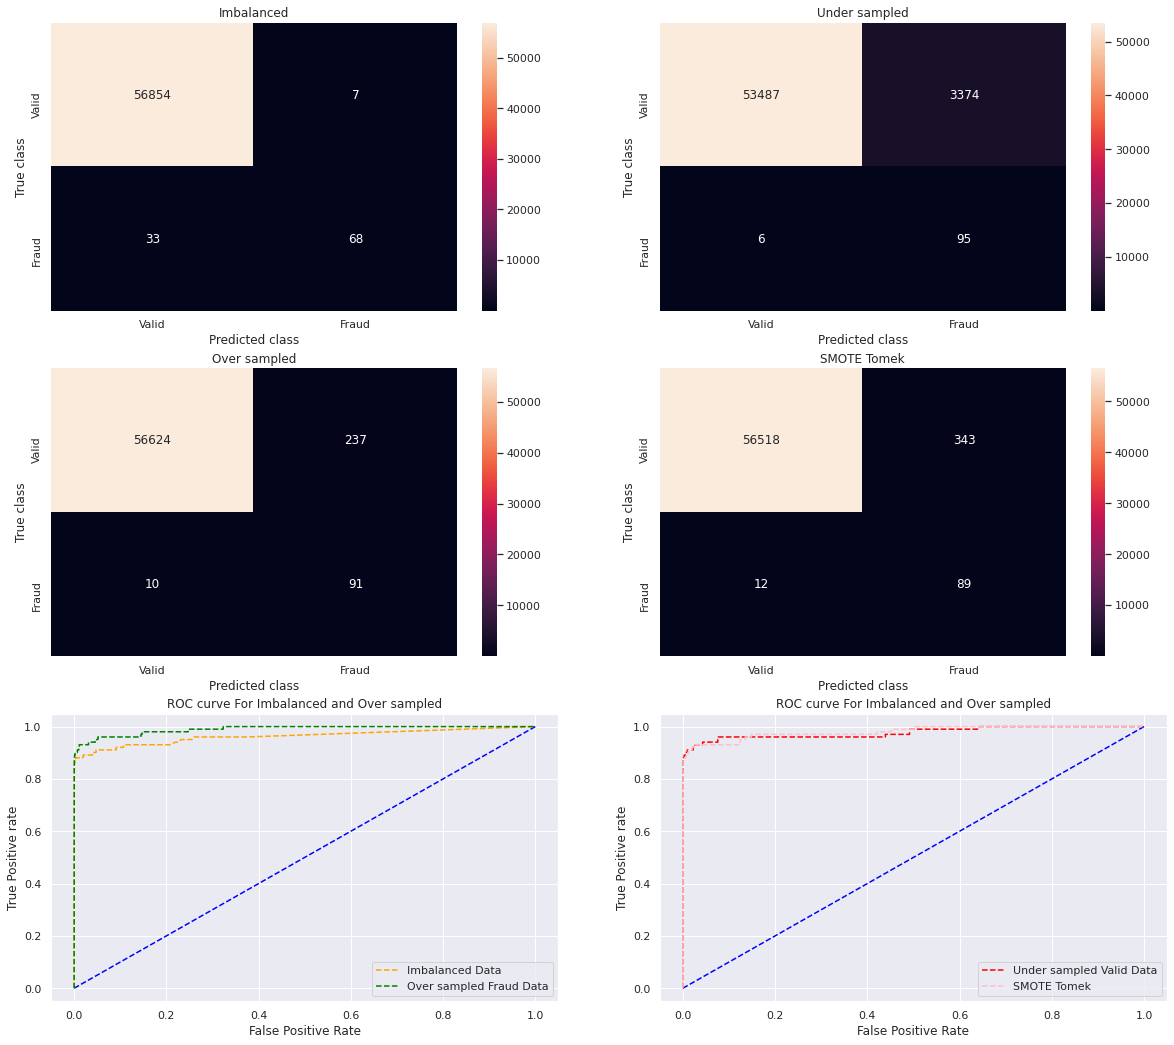

In [31]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(20,18))
LABELS = ['Valid', 'Fraud']

conf_matrix1 = confusion_matrix(y_test, rf_yhat)
sns.heatmap(conf_matrix1, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", ax=ax1)
ax1.set_title("Imbalanced")
ax1.set_ylabel("True class")
ax1.set_xlabel("Predicted class")

conf_matrix2 = confusion_matrix(y_test, rf_nm_yhat)
sns.heatmap(conf_matrix2, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", ax=ax2)
ax2.set_title("Under sampled")
ax2.set_ylabel("True class")
ax2.set_xlabel("Predicted class")

conf_matrix3 = confusion_matrix(y_test, rf_os_yhat)
sns.heatmap(conf_matrix3, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", ax=ax3)
ax3.set_title("Over sampled")
ax3.set_ylabel("True class")
ax3.set_xlabel("Predicted class")

conf_matrix4 = confusion_matrix(y_test, rf_smk_yhat)
sns.heatmap(conf_matrix4, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", ax=ax4)
ax4.set_title("SMOTE Tomek")
ax4.set_ylabel("True class")
ax4.set_xlabel("Predicted class")

#plot curve for tpr = fpr
ax5.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# plot roc curves
ax5.plot(fpr, tpr, linestyle='--',color='orange', label='Imbalanced Data')
ax5.plot(fpr_os, tpr_os, linestyle='--',color='green', label='Over sampled Fraud Data')
ax5.set_title("ROC curve For Imbalanced and Over sampled")
ax5.set_ylabel("True Positive rate")
ax5.set_xlabel("False Positive Rate")
ax5.legend(loc='best')
# plt.savefig('ROC',dpi=300)


#plot curve for tpr = fpr
ax6.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# plot roc curves
ax6.plot(fpr_nm, tpr_nm, linestyle='--',color='red', label='Under sampled Valid Data')
ax6.plot(fpr_smk, tpr_smk, linestyle='--',color='pink', label='SMOTE Tomek')
ax6.set_title("ROC curve For Imbalanced and Over sampled")
ax6.set_ylabel("True Positive rate")
ax6.set_xlabel("False Positive Rate")
ax6.legend(loc='best')

In [32]:
# Create dataframe with metrics
df_metrics = pd.DataFrame(columns=['Data Type', 'Accuracy [%]', 'Precision [%]','Recall [%]','F1 Score [%]','MCC', 'AUC', 'Compute Time [min]'])


# Add Imbalnaced Data Metrics
df_metrics = df_metrics.append({'Data Type': 'Imbalanced Data', 'Accuracy [%]' : rf_acc,
                                'Precision [%]' : rf_pre, 'Recall [%]' : rf_rec, 'F1 Score [%]' : rf_f1,
                                'MCC' : rf_mcc, 'AUC' : auc_score, 
                                'Compute Time [min]' : time_rf}, ignore_index = True)

# Add Under Sampled Data Metrics
df_metrics = df_metrics.append({'Data Type': 'Under sampled Valid', 'Accuracy [%]' : rf_nm_acc,
                                'Precision [%]' : rf_nm_pre, 'Recall [%]' : rf_nm_rec, 'F1 Score [%]' : rf_nm_f1,
                                'MCC' : rf_nm_mcc, 'AUC' : auc_score_nm, 
                                'Compute Time [min]' : time_rf_nm + time_nm,}, ignore_index = True)

# Add Over Sampled Data Metrics
df_metrics = df_metrics.append({'Data Type': 'Over sampled Valid', 'Accuracy [%]' : rf_os_acc,
                                'Precision [%]' : rf_os_pre, 'Recall [%]' : rf_os_rec, 'F1 Score [%]' : rf_os_f1,
                                'MCC' : rf_os_mcc, 'AUC' : auc_score_os, 
                                'Compute Time [min]' : time_rf_os + time_os}, ignore_index = True)

# Add SMOTETomek Data Metrics
df_metrics = df_metrics.append({'Data Type': 'SMOTETomek', 'Accuracy [%]' : rf_smk_acc,
                                'Precision [%]' : rf_smk_pre, 'Recall [%]' : rf_smk_rec, 'F1 Score [%]' : rf_smk_f1,
                                'MCC' : rf_smk_mcc, 'AUC' : auc_score_smk, 
                                'Compute Time [min]' : time_rf_smk + time_smk}, ignore_index = True)

df_metrics


,Data Type,Accuracy [%],Precision [%],Recall [%],F1 Score [%],MCC,AUC,Compute Time [min]
0,Imbalanced Data,99.9,90.7,67.3,77.3,0.78,0.96,1.0
1,Under sampled Valid,94.1,2.7,94.1,5.3,0.16,0.98,0.0
2,Over sampled Valid,99.6,27.7,90.1,42.4,0.50,0.99,2.0
3,SMOTETomek,99.4,20.6,88.1,33.4,0.42,0.98,2.0


<h3> Initial conclusion from data augmentation </h3>

Above, three methods of data augmentation have been used and compared to the original imbalanced data. These methods of augmentation are:
<ol>
    <li>Under sampling of valid transactions (majority of transactions)</li>
    <li>Over sampling of fraud transactions (only about 0.17% of overall number of transactions)</li>
    <li>Mix of under and over sampling using SMOTETomek which is a hybrid method that uses an under sampling method (Tomek) with over sampling method (SMOTE) involves the removal of the Tomek links which are the pairs of examples that are in closest proximity to each other or called the nearest neighbours but belongs to opposite classes. </li>
</ol>

The objective of this exercise is to detect fraud, hence main objective it to find as many true positives (fraudulent transactions that has been recognised as fraudulent). 
<br>
Model trained on imbalanced data where Precision rate is 90.5% i.e., only 7 transactions are mistaken as fraudulent, have not too bad Recall rate 66.3% which is 34 transactions erroneously identified as valid. 
<br>
Model trained on under sampled training data has the greatest success at detecting fraudulent transactions. Recall rate is 95% or only 5 fraudulent transactions out of 101 fraudulent transactions presented in the training dataset are falsely identified as valid transactions. However, this success comes at a cost of low Precision rate 1.7%, this means that 5409 valid transactions have been mistakenly classified as fraudulent. This is not optimal because this would mean that 5409 transactions would require an additional confirmation steps or human employee intervention. This would be most likely unacceptable for card issuer as this would require enormous cost to verify all these transactions. Also, customers would most likely terminate their cards as the hassle of validating every transaction would be too big to bear. And all this to catch only 0.17% of transactions. 
<br>
Next best model is trained on test data with oversampled fraudulent transactions. This model misses 10 fraudulent transactions (false negatives), this translates to high Recall rate = 90.1%. Simultaneously only 258 transactions are mistakenly classified as fraudulent out of 55861 total valid transactions, this translates to Precision score of 26.1%. 
<br>
Model trained on data set augmented based on SMOTETomek is slightly worse than model trained on oversampled data i.e., Recall rate is 89.1% which means 11 fraudulent transactions are classified as valid and Precision rate is 21.4% which means 331 transactions are mistakenly classified as fraudulent out of 56861.
<br>
The decision between imbalanced training data set and oversampled data set should be chosen based on cost vs benefit analysis. For further proceedings in this document, we will choose oversampled data set.
 


 

 


<a href='#index'>Back to Index</a>
<a name='opt'></a>
<h2>9. Finetuning Radom Forest model for Recall Rate using GridSearchCV</h2>

<h3>This is Radom Forest model fine tuning for Recall using GridSearchCV, trained on unbalanced data set</h3>

In [33]:
start = time.time()

parameters = { 
    # 'n_estimators': [200, 500], 
    # 'max_features': ['auto', 'sqrt', 'log2'], 
    'max_depth' : [4,5,6,7,8],  
    'criterion' :['gini', 'entropy'] 
}
rf_gs_cv=GridSearchCV(estimator = RandomForestClassifier(),
                      param_grid = parameters,
                      scoring = 'recall',cv=3, n_jobs = -1
                      )
rf_gs_cv.fit(x_train,y_train)

end  = time.time()
time_cv = exec_time(start,end)

Execution Time: 00:26:04


In [34]:
rf_opt_recall = rf_gs_cv.best_score_
rf_opt_recall_param = rf_gs_cv.best_params_ 

In [35]:
print(f"Recall:",rf_opt_recall," Parameters:", rf_opt_recall_param)

Recall: 0.7571736151888824  Parameters: {'criterion': 'entropy', 'max_depth': 7}


<h3>This is Radom Forest model fine tuning for Recall using GridSearchCV, trained on data set with oversampled fraudulent transactions. </h3>

In [36]:
start = time.time()

parameters = { 
    # 'n_estimators': [200, 500],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
rf_gs_cv_os=GridSearchCV(estimator = RandomForestClassifier(),
                         param_grid = parameters,
                         scoring = 'recall',
                         cv=5, n_jobs = -1
                         )
rf_gs_cv_os.fit(x_os_train, y_os_train)

end  = time.time()
time_cv_os = exec_time(start,end)

Execution Time: 01:10:60


In [37]:
rf_opt_recall_os = rf_gs_cv_os.best_score_
rf_opt_recall_param_os = rf_gs_cv_os.best_params_ 

In [38]:
print(f"Recall:",rf_opt_recall_os," Parameters:", rf_opt_recall_param_os)

Recall: 0.9770536799639672  Parameters: {'criterion': 'entropy', 'max_depth': 8}


<h3>This is Radom Forest model fine tuned for Recall, trained on unbalanced data set</h3>

In [39]:
# This takes about 8 min to run
start = time.time()

rf_param = rf_opt_recall_param.copy()
# rf_param = {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 500}


from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
rf_opt = RandomForestClassifier(
                                # n_estimators = rf_param['n_estimators'],
                                # max_features = rf_param['max_features'],
                                max_depth = rf_param['max_depth'],
                                criterion = rf_param['criterion'],
                               )
rf_opt.fit(x_train, y_train)
rf_opt_yhat = rf_opt.predict(x_test)

end  = time.time()
time_rf_opt = exec_time(start,end)

Execution Time: 00:02:19


In [40]:
# Metrics for Imbalanced data
rf_opt_acc = round(accuracy_score(y_test, rf_opt_yhat) *100,1)
rf_opt_pre = round(precision_score(y_test, rf_opt_yhat) *100,1)
rf_opt_rec = round(recall_score(y_test, rf_opt_yhat) *100,1)
rf_opt_f1 = round(f1_score(y_test, rf_opt_yhat) *100,1)
rf_opt_mcc = round(matthews_corrcoef(y_test, rf_opt_yhat),2)
print(cl('Metrics for fine tuned algorithm on dataset with imbalanced dataset:', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest model is {}%'.format(rf_opt_acc), attrs = ['bold']))
print(cl('Precision score of the Random Forest model is {}%'.format(rf_opt_pre), attrs = ['bold']))
print(cl('Recall score of the Random Forest model is {}%'.format(rf_opt_rec), attrs = ['bold']))
print(cl('f1 score of the Random Forest model is {}%'.format(rf_opt_f1), attrs = ['bold']))
print(cl('Matthews Correlation Coefficient of the Random Forest model is {}'.format(rf_opt_mcc), attrs = ['bold']))

Metrics for fine tuned algorithm on dataset with imbalanced dataset:
Accuracy score of the Random Forest model is 100.0%
Precision score of the Random Forest model is 92.0%
Recall score of the Random Forest model is 79.2%
f1 score of the Random Forest model is 85.1%
Matthews Correlation Coefficient of the Random Forest model is 0.85


<h3>This is Radom Forest model fine tuned for Recall, trained on data set with oversampled fraudulent transactions.</h3>

In [41]:
# This takes about 4 min to run
start = time.time()

rf_param = rf_opt_recall_param_os.copy()
# rf_param = {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}

rf_opt_os = RandomForestClassifier(
                                  #  n_estimators = rf_param['n_estimators'],
                                  #  max_features = rf_param['max_features'],
                                   max_depth = rf_param['max_depth'],
                                   criterion = rf_param['criterion'],
)

rf_opt_os.fit(x_os_train, y_os_train)
rf_opt_os_yhat = rf_opt_os.predict(x_test)

end  = time.time()
time_rf_opt_os = exec_time(start,end)

Execution Time: 00:03:37


In [42]:
# Metrics for Data with oversampled fraud data
rf_opt_os_acc = round(accuracy_score(y_test, rf_opt_os_yhat) *100,1)
rf_opt_os_pre = round(precision_score(y_test, rf_opt_os_yhat) *100,1)
rf_opt_os_rec = round(recall_score(y_test, rf_opt_os_yhat) *100,1)
rf_opt_os_f1 = round(f1_score(y_test, rf_opt_os_yhat) *100,1)
rf_opt_os_mcc = round(matthews_corrcoef(y_test, rf_opt_os_yhat),2)
print(cl('Metrics for fine tuned algorithm on dataset with oversampled fraudulent transactions:', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest model is {}%'.format(rf_opt_os_acc), attrs = ['bold']))
print(cl('Precision score of the Random Forest model is {}%'.format(rf_opt_os_pre), attrs = ['bold']))
print(cl('Recall score of the Random Forest model is {}%'.format(rf_opt_os_rec), attrs = ['bold']))
print(cl('f1 score of the Random Forest model is {}%'.format(rf_opt_os_f1), attrs = ['bold']))
print(cl('Matthews Correlation Coefficient of the Random Forest model is {}'.format(rf_opt_os_mcc), attrs = ['bold']))

Metrics for fine tuned algorithm on dataset with oversampled fraudulent transactions:
Accuracy score of the Random Forest model is 99.9%
Precision score of the Random Forest model is 75.0%
Recall score of the Random Forest model is 98.0%
f1 score of the Random Forest model is 85.0%
Matthews Correlation Coefficient of the Random Forest model is 0.86


<a href='#index'>Back to Index</a>
<a name='comparison'></a>
<h2>9. Comparison - Tuned vs Untuned Model</h2>

In [43]:
# predict probabilities
# pred_prob = rf.predict_proba(x_test) - This is here for reference only, it was computed above
pred_prob_opt = rf_opt.predict_proba(x_test)
# pred_prob_os = rf_os.predict_proba(x_test) - This is here for reference only, it was computed above
pred_prob_opt_os = rf_opt_os.predict_proba(x_test)

# roc curve for models
# fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1) - This is here for reference only, it was computed above
fpr_opt, tpr_opt, thresh_opt = roc_curve(y_test, pred_prob_opt[:,1], pos_label=1)
# fpr_os, tpr_os, thresh_os = roc_curve(y_test, pred_prob_os[:,1], pos_label=1) - This is here for reference only, it was computed above
fpr_opt_os, tpr_opt_os, thresh_opt_os = roc_curve(y_test, pred_prob_opt_os[:,1], pos_label=1)

# This is here for reference only, it was computed above
# # roc curve for tpr = fpr 
# random_probs = [0 for i in range(len(y_test))]
# p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
# auc_score = round(roc_auc_score(y_test, pred_prob[:,1]),2) - This is here for reference only, it was computed above
auc_score_opt = round(roc_auc_score(y_test, pred_prob_opt[:,1]),2)
# auc_score_os = round(roc_auc_score(y_test, pred_prob_os[:,1]),2) - This is here for reference only, it was computed above
auc_score_opt_os = round(roc_auc_score(y_test, pred_prob_opt_os[:,1]),2)

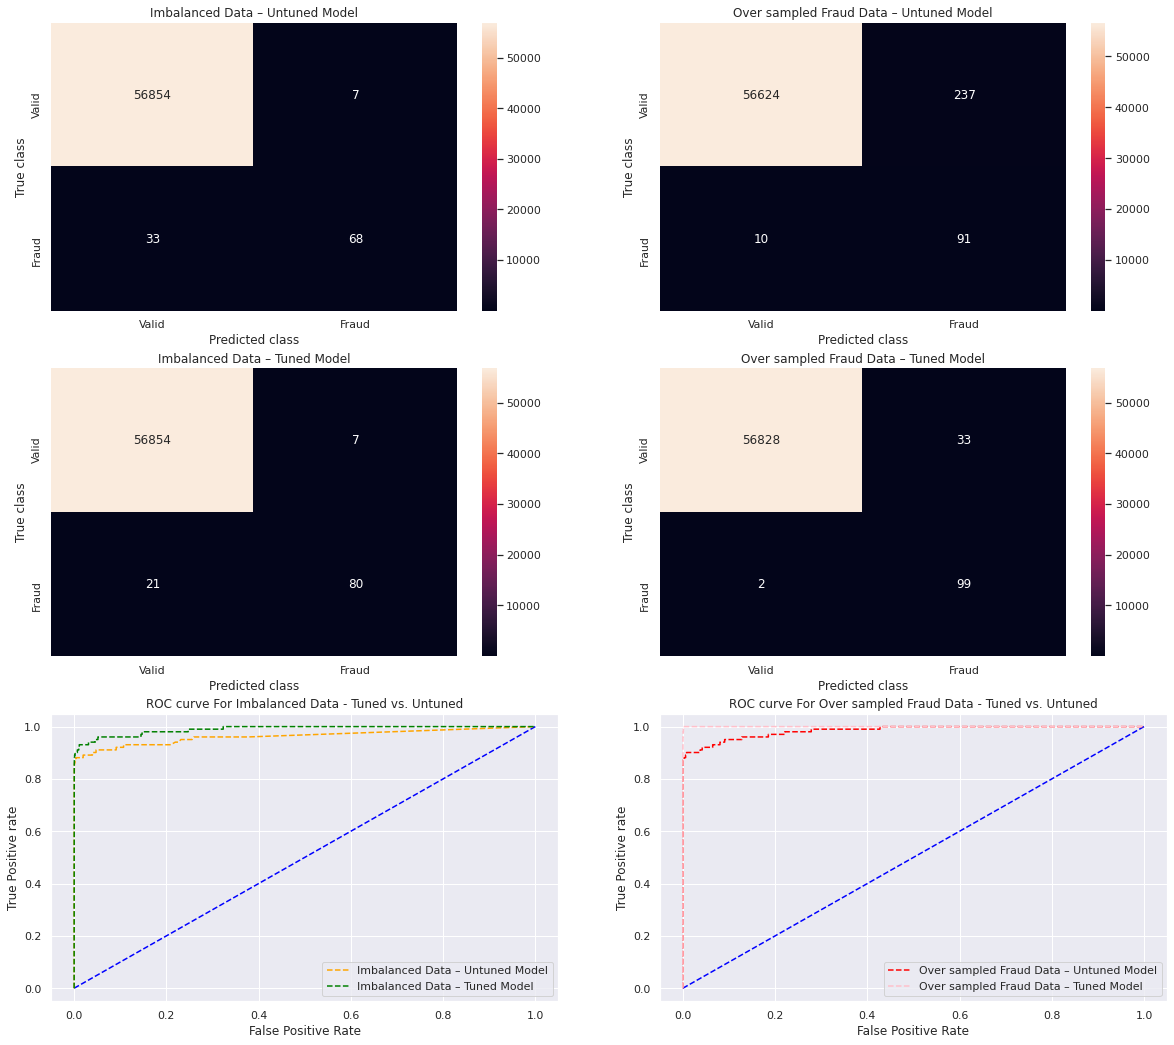

In [44]:
fig2, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(20,18))
LABELS = ['Valid', 'Fraud']

conf_matrix1 = confusion_matrix(y_test, rf_yhat)
sns.heatmap(conf_matrix1, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", ax=ax1)
ax1.set_title("Imbalanced Data – Untuned Model")
ax1.set_ylabel("True class")
ax1.set_xlabel("Predicted class")

conf_matrix2 = confusion_matrix(y_test, rf_os_yhat)
sns.heatmap(conf_matrix2, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", ax=ax2)
ax2.set_title("Over sampled Fraud Data – Untuned Model")
ax2.set_ylabel("True class")
ax2.set_xlabel("Predicted class")

conf_matrix3 = confusion_matrix(y_test, rf_opt_yhat)
sns.heatmap(conf_matrix3, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", ax=ax3)
ax3.set_title("Imbalanced Data – Tuned Model")
ax3.set_ylabel("True class")
ax3.set_xlabel("Predicted class")

conf_matrix4 = confusion_matrix(y_test, rf_opt_os_yhat)
sns.heatmap(conf_matrix4, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d", ax=ax4)
ax4.set_title("Over sampled Fraud Data – Tuned Model")
ax4.set_ylabel("True class")
ax4.set_xlabel("Predicted class")

#plot curve for tpr = fpr
ax5.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# plot roc curves
ax5.plot(fpr, tpr, linestyle='--',color='orange', label='Imbalanced Data – Untuned Model')
ax5.plot(fpr_os, tpr_os, linestyle='--',color='green', label='Imbalanced Data – Tuned Model')
ax5.set_title("ROC curve For Imbalanced Data - Tuned vs. Untuned")
ax5.set_ylabel("True Positive rate")
ax5.set_xlabel("False Positive Rate")
ax5.legend(loc='best')
# plt.savefig('ROC',dpi=300)


#plot curve for tpr = fpr
ax6.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# plot roc curves
ax6.plot(fpr_opt, tpr_opt, linestyle='--',color='red', label='Over sampled Fraud Data – Untuned Model')
ax6.plot(fpr_opt_os, tpr_opt_os, linestyle='--',color='pink', label='Over sampled Fraud Data – Tuned Model')
ax6.set_title("ROC curve For Over sampled Fraud Data - Tuned vs. Untuned")
ax6.set_ylabel("True Positive rate")
ax6.set_xlabel("False Positive Rate")
ax6.legend(loc='best')

In [45]:
# Create dataframe with metrics
df_metrics_opt = pd.DataFrame(columns=['Data Type', 'Accuracy [%]', 'Precision [%]','Recall [%]',
                                       'F1 Score [%]','MCC', 'AUC', 'Compute Time [min]'])


# Add Metrics of Untuned Model on Imbalnaced Data 
df_metrics_opt = df_metrics_opt.append({'Data Type': 'Imbalanced Data - Untuned Model',
                                        'Accuracy [%]' : rf_acc, 'Precision [%]' : rf_pre,
                                        'Recall [%]' : rf_rec,'F1 Score [%]' : rf_f1,
                                        'MCC' : rf_mcc, 'AUC' : auc_score,
                                        'Compute Time [min]' : time_rf
                                       }, ignore_index = True
                                      )

# Add Metrics of Tuned Model on Imbalnaced Data 
df_metrics_opt = df_metrics_opt.append({'Data Type': 'Imbalanced Data - Tuned Model',
                                        'Accuracy [%]' : rf_opt_acc, 'Precision [%]' : rf_opt_pre,
                                        'Recall [%]' : rf_opt_rec, 'F1 Score [%]' : rf_opt_f1,
                                        'MCC' : rf_opt_mcc, 'AUC' : auc_score_opt,
                                        'Compute Time [min]' : time_cv + time_rf_opt,
                                       }, ignore_index = True
                                      )

# Add Metrics of Untuned Model on Oversampled Valid Data 
df_metrics_opt = df_metrics_opt.append({'Data Type': 'Over sampled Valid - Untuned Model',
                                        'Accuracy [%]' : rf_os_acc, 'Precision [%]' : rf_os_pre,
                                        'Recall [%]' : rf_os_rec, 'F1 Score [%]' : rf_os_f1,
                                        'MCC' : rf_os_mcc, 'AUC' : auc_score_os,
                                        'Compute Time [min]' : time_os + time_rf_os},
                                       ignore_index = True
                                      )

# Add Metrics of Tuned Model on Oversampled Valid Data 
df_metrics_opt = df_metrics_opt.append({'Data Type': 'Over sampled Valid - Tuned Model', 'Accuracy [%]' : rf_opt_os_acc,
                                        'Precision [%]' : rf_opt_os_pre, 'Recall [%]' : rf_opt_os_rec,
                                        'F1 Score [%]' : rf_opt_os_f1, 'MCC' : rf_opt_os_mcc,  'AUC' : auc_score_opt_os,
                                        'Compute Time [min]' : time_os+time_cv_os+time_rf_opt_os}, ignore_index = True)

df_metrics_opt

,Data Type,Accuracy [%],Precision [%],Recall [%],F1 Score [%],MCC,AUC,Compute Time [min]
0,Imbalanced Data - Untuned Model,99.9,90.7,67.3,77.3,0.78,0.96,1.0
1,Imbalanced Data - Tuned Model,100.0,92.0,79.2,85.1,0.85,0.98,28.0
2,Over sampled Valid - Untuned Model,99.6,27.7,90.1,42.4,0.50,0.99,2.0
3,Over sampled Valid - Tuned Model,99.9,75.0,98.0,85.0,0.86,1.00,75.0


<h3>Conclusion after fine tuning</h3>
Fine tuning improved performance of algorithms trained on both data sets (imbalanced and the data set with oversampled fraud transactions). Clear winner in terms of detecting fraudulent transactions (recall) as well minimizing number of mistaken valid transaction for fraudulent transactions (precision) is the tuned algorithm trained on data set with over sampled fraudulent transactions.
So far, the training and fine tuning has been performed on a specific split of data on training and testing sets. 
How would the model have performed on different splits of the data? To answer that question, we need to use a technique called cross validation. Below we are going to use this technique on our best performer:


<a href='#index'>Back to Index</a>
<a name='cv'></a>
<h2>10. Random Forests - Cross Validation</h2>

In [46]:
start  = time.time()

# # %%time takes it takes roughly 1h 13min to run this cell

rf_cv_opt = np.array(cross_val_score(rf_opt, x_train, y_train, cv=10, scoring = 'recall')) 

end  = time.time()
time_rf_cv_opt = exec_time(start,end)

Execution Time: 00:20:42


In [47]:
rf_cv_opt.min(), rf_cv_opt.mean()

(0.6153846153846154, 0.7647435897435898)

In [48]:
start  = time.time()

# # %%time takes it takes roughly 1h 13min to run this cell

rf_cv_opt_os = np.array(cross_val_score(rf_opt_os, x_train, y_train, cv=10, scoring = 'recall')) 

end  = time.time()
time_rf_cv_opt_os = exec_time(start,end)

Execution Time: 00:23:00


In [49]:
rf_cv_opt_os.min(), rf_cv_opt_os.mean()

(0.5897435897435898, 0.7672435897435896)

<h3>Conclusion after Cross Validation</h3>
Below there is a table showing Recall rate of model trained on imbalanced data set (baseline) and oversampled dataset. Cross validation shown below, shows that model trained on data set with over sampled fraudulent transactions is expected to perform better than the baseline but only by narrow margin and only in the worst case and best case scenario. On average both models are expected to perform similarly.

|TRAINING SET TYPE| ON TRAINED SET [%] | CV MEAN [%] | CV MIN [%] |
| --- | --- | --- | --- |
| Imbalanced | 79% | 76%  | 61% |
| Oversampled | 98% | 76% | 58% |


<a href='#index'>Back to Index</a>
<a name='vis'></a>
<h2>11. Random Forests - Visualisation</h2>

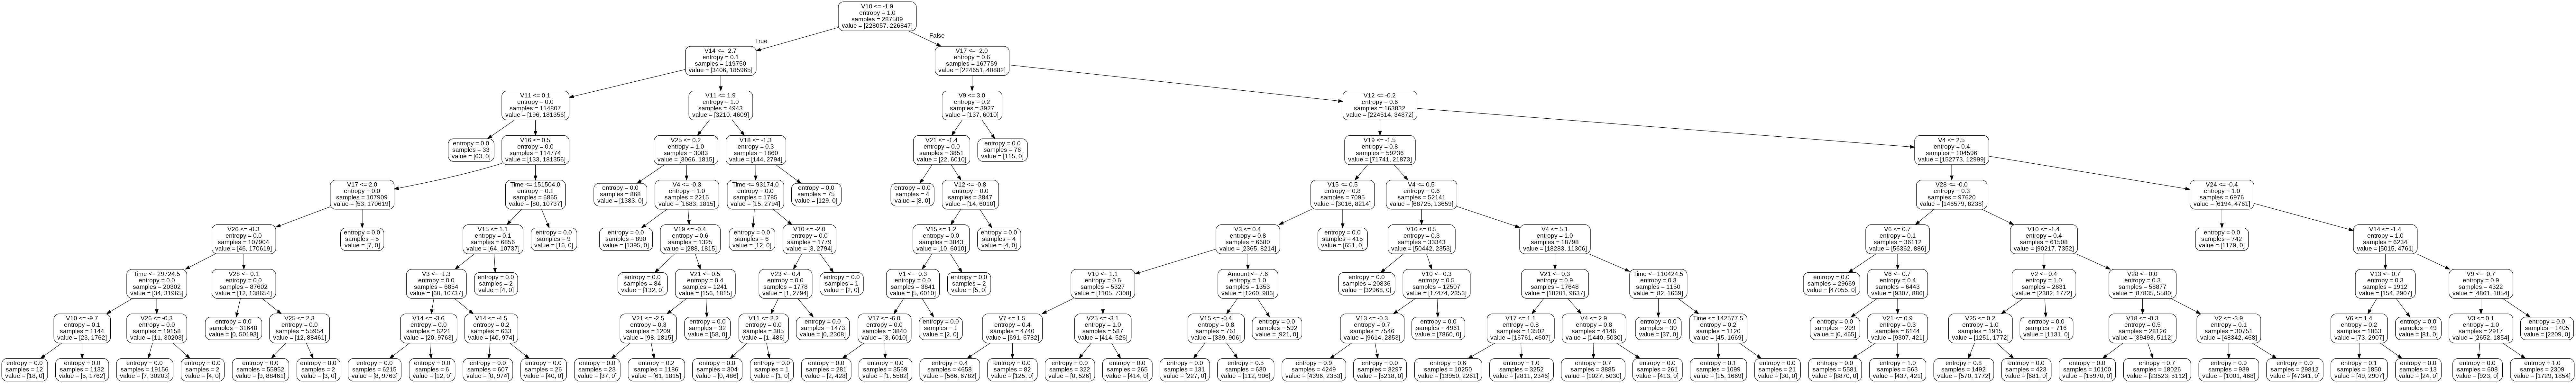

In [56]:
x_df = df.drop(['Class'], axis = 1)
feature_list = list(x_df.columns)

# pulling out one tree from the forest
tree = rf_opt_os.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# #Write graph to a png file
display(Image(graph.create_png()))


<a href='#index'>Back to Index</a>
<a name='glos'></a>
<h2>12. Glossary</h2>

<strong>Simple Accuracy</strong> is one of the most basic evaluation metrics. The accuracy score is calculated simply by dividing the number of correct predictions made by the model by the total number of predictions:
<br><br>
$Simple Accuracy = \frac{No. of correct predictions}{Total  no.of predictions} = \frac{True Positive + True Negative}{True Positive + True Negative + False Postivie + False Negative}$ 
<br><br>
The <span style="color:red;font-weight: bold">problem</span> with <strong>Simple Accuracy</strong> appears when data is unbalanced, like in this task where fraudulent transactions is only 0.17%. When the model would indicate that all the transactions are valid and totaly disregard fraudulent transactions, accuracy would be

all_ok_accuracy $ = \frac{TP + TN}{TP + TN + FP + FN} = \frac{0 + 284315}{0 + 284315 + 0 + 492}*100\% = 99.8\% $
<br><br>
This shows almost perfect accuracy, but we have not detected any fraud. I am not sure whether the credit card issuer had this in their mind 😉 
<br><br>
<hr>
<strong>Cross Validation</strong>
Models are assessed based on particular split into training data and test data (see <a href='#split'>train_test_split</a>). The issue might be that "we are lucky" with our split and our models work well in our particular case.<br><br>
<strong>But what if we had a different split?</strong> Fortunately, <strong>Cross Validation</strong> comes to the rescue! <br><br> Cross validation essentially splits the training data into training data and validation data, trains the model and checks it against validation set. 
<br><br>Then the step is repeated multiple times (multiple experiments in figure below) with different split between test data and validation data. <br><br>
After multiple operations of splitting and validation, we get an array of metrics. From the array we will learn what is the worst, what is mean value of the metric. This gives us insight into how our model will perform in production which can be communicated to the decision makers.
<br>
<img src="https://habrastorage.org/files/b1d/706/e6c/b1d706e6c9df49c297b6152878a2d03f.png" alt="cross validation diagram" class="bg-primary" width="600px" style="display: block; margin-left: auto; margin-right: auto;">
<hr>
<strong>Matthews Correlation Coefficient</strong> The coefficient takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. <br>
The MCC is in essence a correlation coefficient between the observed and predicted binary classifications; it returns a value between −1 and +1.
<ul>
  <li> +1 represents a perfect prediction</li>
  <li> 0 no better than random prediction</li>
  <li> −1 indicates total disagreement between prediction and observation</li>
</ul>
<br><br>
$$ MCC = \frac{TP \cdot TN - FP \cdot FN}{\sqrt{(TP+FP) \cdot (TP+FN) \cdot (TN+FP) \cdot (TN+FN)}}$$
<br><br>
The bottom line is that MCC will only give a high score if both classes are well predicted, while F1 score will indicate good performance on highly unbalanced data, while this might not be the case.
<hr>
<strong>F-score or F1-score</strong> is a measure of a model's accuracy on a dataset. It is used to evaluate binary classificantion systems, which classify examples into <strong>positive</strong> or <strong>negative</strong>. <br>
The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model's precision and recall. <br>
The F-score is acommonly used for evaulating information retrieval systems such as search engines, and also for many kinds of machine learning models, in particular in natural language processing.
$$ F1 = \frac{2}{\frac{1}{Recall} \cdot \frac{1}{Precsion}}$$
<a href="https://deepai.org/machine-learning-glossary-and-terms/f-score#:~:text=The%20F%2Dscore%2C%20also%20called,model's%20accuracy%20on%20a%20dataset.&text=The%20F%2Dscore%20is%20a,the%20model's%20precision%20and%20recall.">Source of info</a>
<hr>
<strong>PRECISION</strong> tries answer the question: Out of the all the emails, sent to the spam inbox, how many were actually spam?

$$ Precision = \frac{True Positive}{True Positive + False Positive} = \frac{Spam In Spam Folder}{Spam In Spam Folder + Not Spam In Spam Folder}$$

We <span style="color:green;font-weight: bold">CARE</span> about <strong>High Precision</strong> when we want to make sure that whatever we classify as positive, is definitely a positive and not a false positive. 
<br><br>
Good example is a spam detector:
<br>
We want to make sure that whatever is classified as SPAM (TRUE) is definitely as SPAM (TRUE POSITIVE). Because the risk of sending an important email to SPAM (FALSE POSITIVE) significantly out weights the hassle of getting some SPAM emails through our filter from time to time (FALSE NEGATIVE).
<hr>
<strong>RECALL</strong>  tres to answer the question: Out of the sick patients, how many did we correctly diagnose as sick?
<br><br>
$$ Recall = \frac{True Positive}{True Positive + False Negative} = \frac{Sick Patient DiagnosedAsSick}{Sick Patient
DiagnosedAsSick + Sick Patient DiagnosedAsHealthy}$$
<br>
We <span style="color:green;font-weight: bold">CARE</span> about <strong>High Recall</strong> when we want to make sure that we find as much postives as possible. 
<br><br>
Good example is a medical diagnostics:
<br>
We want to make sure that we find as much sick people (TRUE POSITIVE) as possible and we won't send back home without treatment anybody who is sick (FALSE NEGATIVE). So in this case we don't care too much if we diagnose as a sick person somebody who is healthy (FALSE POSTIVE) because it will cost us some extra checks. Whrease sending somebody who is sick without treament might be deadly for that person.
<hr>